In [ ]:
pip install nibabel

In [50]:
# Calculs scientifiques
import numpy as np
# Gestion des formats IRM
import nibabel as nib
# Création et affichage de graphiques
import matplotlib.pyplot as plt

### 1) Importer les données

In [37]:
# La fonction load vous sert à importer vos fichiers
mri_img = nib.load('C:\\Users\\Lenovo\\Downloads\\tp_2-20231207T132902Z-001\\tp_2\\data\\IXI330-Guys-0881-T1.nii\\IXI330-Guys-0881-MPRAGESEN_-s299_-0301-00003-000001-01.nii')
print(mri_img)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 150)
affine:
[[-4.27650400e-02  1.79124363e-02  1.19853210e+00 -8.60915909e+01]
 [-9.36523736e-01 -1.01643954e-19 -5.47492690e-02  1.23196281e+02]
 [ 8.17243592e-04  9.37328815e-01 -2.29040533e-02 -1.15913986e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 150   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     1.2000005  0.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
c

### 2) Extraction des données 

In [27]:
# Extraction du header où sont stocker les métadonnées de la matrice
mri_header = mri_img.header
mri_affine = mri_img.affine

# Extraction des données de l'image IRM
mri_matrix = mri_img.get_fdata()

# La fonction shape retourne la dimension de la matrice
print(mri_matrix.shape)

(256, 256, 150)


### 3)Visualisation

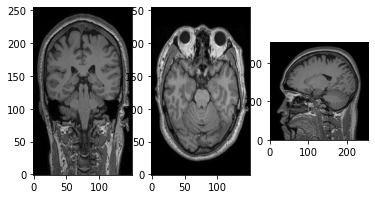

In [28]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

# Visualisation d'une coupe coronale
slice_0 = mri_matrix[150, :, :]

# Visualisation d'une coupe axiale
slice_1 = mri_matrix[:, 120, :]
slice_1 = slice_1.T
slice_1 = np.flip(slice_1,axis=1)


# Visualisation d'une coupe sagittale
slice_2 = mri_matrix[:, :, 90]

show_slices([slice_0.T, slice_1, slice_2])
plt.show()

### 4) Normalisation des matrices 

Nous devons d'abord normaliser nos données pour obtenir des données compris entre 0 et 1 afin d'éviter au maximum les problèmes d'exploding et de vanishing gradient.

Nous allons utiliser la min max normalisation :


In [6]:
print("Intensité minimum : "+str(mri_matrix.min()))
print("Intensité maximum : "+str(mri_matrix.max()))

Intensité minimum : 0.0
Intensité maximum : 1017.0


In [7]:
# min max normalisation de notre matrice
mri_matrix_norm = (mri_matrix - mri_matrix.min()) / (mri_matrix.max() - mri_matrix.min())

print("Intensité minimum : "+str(mri_matrix_norm.min()))
print("Intensité maximum : "+str(mri_matrix_norm.max()))

Intensité minimum : 0.0
Intensité maximum : 1.0


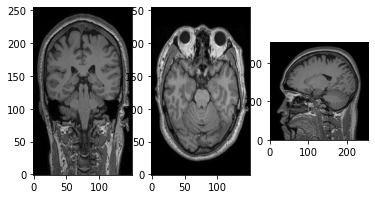

In [8]:
# Visualisation d'une coupe coronale de notre nouvelle matrice
slice_0 = mri_matrix_norm[150, :, :]

# Visualisation d'une coupe axiale de notre nouvelle matrice
slice_1 = mri_matrix_norm[:, 120, :]
slice_1 = slice_1.T
slice_1 = np.flip(slice_1,axis=1)

# Visualisation d'une coupe sagittale de notre nouvelle matrice
slice_2 = mri_matrix_norm[:, :, 90]

show_slices([slice_0.T, slice_1, slice_2])
plt.show()

### Segmentation des Images IRM basée sur le seuil

La segmentation dans le contexte de l'imagerie par résonance magnétique (IRM) consiste à diviser une image en régions ou segments distincts, chaque segment représentant une structure anatomique ou une caractéristique spécifique. L'objectif est de partitionner l'image en zones qui partagent des propriétés similaires, facilitant ainsi l'analyse et l'interprétation des données.

Dans notre projet on va utiliser la segmentation basée sur le seuil qui est une technique simple de segmentation d'image qui consiste à définir un seuil de valeur de pixel pour classer les pixels dans différentes régions ou segments.

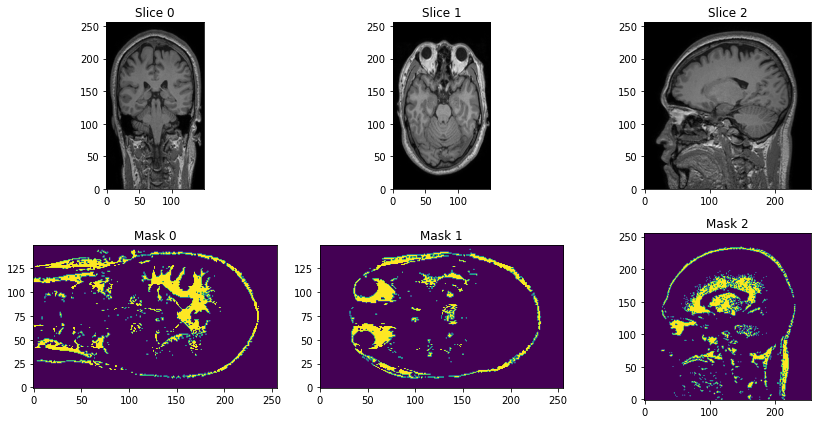

In [9]:
# Threshold for segmentation
threshold_value = 0.4

# Apply thresholding to create a binary mask
binary_mask = mri_matrix_norm > threshold_value

# Visualize the original and segmented images
def show_slices_with_mask(slices, mask_slices):
    """ Function to display row of image slices with corresponding masks """
    fig, axes = plt.subplots(2, len(slices), figsize=(12, 6))

    for i, slice in enumerate(slices):
        axes[0, i].imshow(slice.T, cmap="gray", origin="lower")
        axes[0, i].set_title(f"Slice {i}")

    for i, mask_slice in enumerate(mask_slices):
        axes[1, i].imshow(mask_slice.T, cmap="viridis", origin="lower")
        axes[1, i].set_title(f"Mask {i}")

    plt.tight_layout()

# Visualize the original and segmented images
show_slices_with_mask([slice_0.T, slice_1, slice_2], [binary_mask[150, :, :], binary_mask[:, 120, :], binary_mask[:, :, 90]])
plt.show()


In [ ]:
pip install opencv-python==4.5.3.56

In [ ]:
pip install numpy scikit-learn opencv-python==4.5.3.56

### La segmentation d'images médicales par IRM (Imagerie par Résonance Magnétique) à l'aide de l'algorithme de Fuzzy K-Means
La segmentation d'images médicales par IRM (Imagerie par Résonance Magnétique) à l'aide de l'algorithme de Fuzzy K-Means est un processus visant à diviser une image IRM en régions ou segments distincts en fonction des propriétés des tissus ou structures présents dans l'image. La segmentation est une étape cruciale dans l'analyse d'images médicales, car elle permet d'isoler et d'identifier différentes parties du corps ou des organes.

1. ##### Charger l'image IRM
2. ##### Prétraitement : Normalisation des niveaux de gris (0-1)
3. ##### Définir le nombre de clusters (à ajuster selon le contexte)
4. ##### Appliquer Fuzzy K-Means
5. ##### Obtenir les centres des clusters
6. ##### Attribuer à chaque voxel le degré d'appartenance au cluster dominant
7. ##### Redimensionner les résultats à la forme de l'image d'origine
8. ##### Afficher les résultats

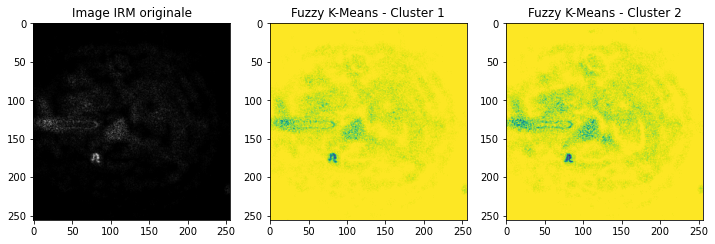

In [46]:
import numpy as np
import nibabel as nib
from sklearn.cluster import KMeans
from skimage import exposure
import matplotlib.pyplot as plt

# Charger l'image IRM
data = mri_img.get_fdata()

# Conversion de l'image en vecteur 1D pour l'entrée de l'algorithme Fuzzy K-Means
data_1d = mri_matrix_norm.reshape((-1, 1))

# Définir le nombre de clusters (à ajuster selon le contexte)
num_clusters = 3

# Appliquer Fuzzy K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
fuzzy_labels = kmeans.fit_predict(data_1d)

# Obtenir les centres des clusters
cluster_centers = kmeans.cluster_centers_

# Attribuer à chaque voxel le degré d'appartenance au cluster dominant
fuzzy_membership = 1 - (1 / (1 + np.exp(-20 * (data_1d - cluster_centers[fuzzy_labels]))))

# Redimensionner les résultats à la forme de l'image d'origine
fuzzy_membership_image = fuzzy_membership.reshape(data.shape)

# Afficher les résultats
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(data[:, :, 0], cmap='gray')
axes[0].set_title('Image IRM originale')

axes[1].imshow(fuzzy_membership_image[:, :, 0], cmap='viridis')
axes[1].set_title('Fuzzy K-Means - Cluster 1')

axes[2].imshow(fuzzy_membership_image[:, :, 1], cmap='viridis')
axes[2].set_title('Fuzzy K-Means - Cluster 2')

plt.show()